In [ ]:
import random
import math

# Define the problem input
orders = [
    {'id': 'A', 'due_date': 5, 'processing_time': 3},
    {'id': 'B', 'due_date': 7, 'processing_time': 2},
    {'id': 'C', 'due_date': 3, 'processing_time': 4},
    {'id': 'D', 'due_date': 9, 'processing_time': 1},
    {'id': 'E', 'due_date': 6, 'processing_time': 2}
]
capacity = 8

# Define the Logistic map function for chaotic perturbation
def logistic_map(x, r=4.0):
    return r * x * (1 - x)

# Calculate the total tardiness of a solution
def calculate_tardiness(solution):
    total_tardiness = 0
    current_time = 0
    for order_id in solution:
        order = next(o for o in orders if o['id'] == order_id)
        current_time += order['processing_time']
        tardiness = max(0, current_time - order['due_date'])
        total_tardiness += tardiness
    return total_tardiness

# Chaotic Simulated Annealing algorithm
def chaotic_simulated_annealing(orders, capacity, max_iterations, initial_temperature, cooling_rate):
    # Initialize the solution randomly
    current_solution = [order['id'] for order in orders]
    random.shuffle(current_solution)
    best_solution = current_solution.copy()

    # Initialize the chaotic map
    x = random.random()

    # Start the annealing process
    current_temperature = initial_temperature
    for iteration in range(max_iterations):
        # Generate a new solution by chaotic perturbation
        new_solution = current_solution.copy()
        i, j = random.sample(range(len(orders)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        # Calculate the tardiness of the current and new solutions
        current_tardiness = calculate_tardiness(current_solution)
        new_tardiness = calculate_tardiness(new_solution)

        # Accept the new solution based on the acceptance criterion
        if new_tardiness < current_tardiness:
            current_solution = new_solution
            if new_tardiness < calculate_tardiness(best_solution):
                best_solution = new_solution
        else:
            x = logistic_map(x)
            acceptance_probability = math.exp((current_tardiness - new_tardiness) / current_temperature)
            if x < acceptance_probability:
                current_solution = new_solution

        # Update the temperature
        current_temperature *= cooling_rate

    return best_solution

# Run the CSA algorithm
max_iterations = 1000
initial_temperature = 100
cooling_rate = 0.95

best_solution = chaotic_simulated_annealing(orders, capacity, max_iterations, initial_temperature, cooling_rate)
print("Best solution:", best_solution)
print("Total tardiness:", calculate_tardiness(best_solution))

Best solution: ['E', 'A', 'B', 'D', 'C']
Total tardiness: 9


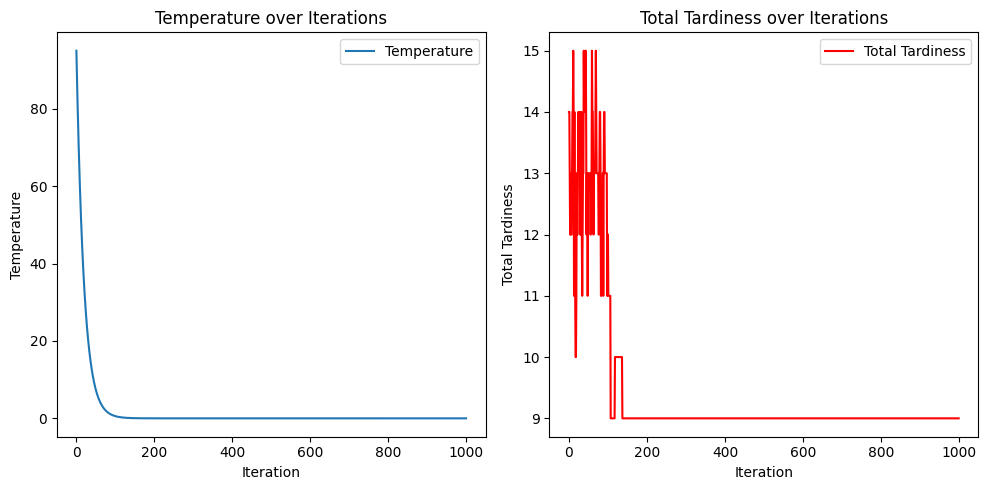

Best solution: ['E', 'A', 'B', 'D', 'C']
Total tardiness: 9


In [ ]:
import random
import math
import matplotlib.pyplot as plt

# Define the Logistic map function for chaotic perturbation
def logistic_map(x, r=4.0):
    return r * x * (1 - x)

# Calculate the total tardiness of a solution
def calculate_tardiness(solution, orders):
    total_tardiness = 0
    current_time = 0
    for order_id in solution:
        order = next(o for o in orders if o['id'] == order_id)
        current_time += order['processing_time']
        tardiness = max(0, current_time - order['due_date'])
        total_tardiness += tardiness
    return total_tardiness

# Chaotic Simulated Annealing algorithm with visualization
def chaotic_simulated_annealing(orders, capacity, max_iterations, initial_temperature, cooling_rate):
    # Initialize the solution randomly
    current_solution = [order['id'] for order in orders]
    random.shuffle(current_solution)
    best_solution = current_solution.copy()

    # Initialize variables for visualization
    temperatures = []
    tardiness_values = []

    # Initialize the chaotic map
    x = random.random()

    # Start the annealing process
    current_temperature = initial_temperature
    for iteration in range(max_iterations):
        # Generate a new solution by chaotic perturbation
        new_solution = current_solution.copy()
        i, j = random.sample(range(len(orders)), 2)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

        # Calculate the tardiness of the current and new solutions
        current_tardiness = calculate_tardiness(current_solution, orders)
        new_tardiness = calculate_tardiness(new_solution, orders)

        # Accept the new solution based on the acceptance criterion
        if new_tardiness < current_tardiness:
            current_solution = new_solution
            if new_tardiness < calculate_tardiness(best_solution, orders):
                best_solution = new_solution
        else:
            x = logistic_map(x)
            acceptance_probability = math.exp((current_tardiness - new_tardiness) / current_temperature)
            if x < acceptance_probability:
                current_solution = new_solution

        # Update the temperature and log values for visualization
        current_temperature *= cooling_rate
        temperatures.append(current_temperature)
        tardiness_values.append(calculate_tardiness(current_solution, orders))

    # Visualize the optimization process
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(temperatures, label='Temperature')
    plt.title('Temperature over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Temperature')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(tardiness_values, label='Total Tardiness', color='r')
    plt.title('Total Tardiness over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Total Tardiness')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return best_solution

# Example usage
orders = [
    {'id': 'A', 'due_date': 5, 'processing_time': 3},
    {'id': 'B', 'due_date': 7, 'processing_time': 2},
    {'id': 'C', 'due_date': 3, 'processing_time': 4},
    {'id': 'D', 'due_date': 9, 'processing_time': 1},
    {'id': 'E', 'due_date': 6, 'processing_time': 2}
]
capacity = 8
max_iterations = 1000
initial_temperature = 100
cooling_rate = 0.95

best_solution = chaotic_simulated_annealing(orders, capacity, max_iterations, initial_temperature, cooling_rate)
print("Best solution:", best_solution)
print("Total tardiness:", calculate_tardiness(best_solution, orders))
